# Housing rate predication using Linear Regression

Housing rate predication using Linear Regression.For the same Boston housing dataset used which is downloaded from kaggle.

We divided work in following parts:

1.Importing dependencies and Load data

2.Exploratory Data Analysis(EDA)

3.Model Creation

4.Model Evaluation

In [87]:
##1.Importing dependencies and Load data
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import StandardScaler

In [141]:
# Loading dataset

data=pd.read_csv('Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [142]:
# drop the column Unnamed

data=data.drop('Unnamed: 0',axis=1)
data.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [143]:
#rows and columns

data.shape

(506, 14)

In [144]:
# Column information

data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [15]:
# Data types

data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [16]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [145]:
#Null value checking

data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [146]:
# Stastical information

data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

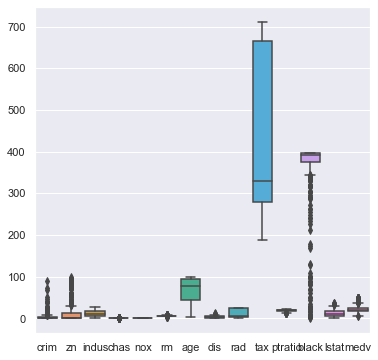

In [147]:
# Outlier Detection

sns.set(rc={"figure.figsize":(6,6)})
sns.boxplot(data=data)

<AxesSubplot:>

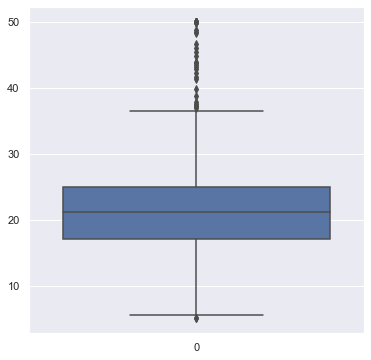

In [148]:
sns.boxplot(data=data.medv)

In [149]:
# Removal of Outlier of medv

q1=data['medv'].quantile(0.25)
q3=data['medv'].quantile(0.75)
IQR=q3-q1
lo=q1-1.5*IQR
up=q3+1.5*IQR
data1=data[~((data.medv>up)|(data.medv<lo))]
data1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:>

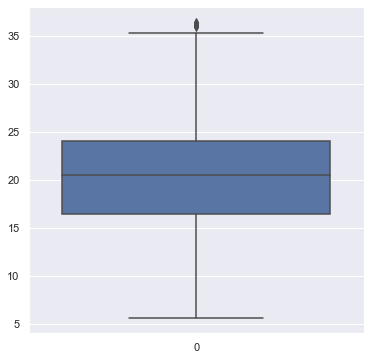

In [150]:
sns.boxplot(data=data1.medv)

In [151]:
# Removal of Outlier of lstat

Q1=data1.lstat.quantile(0.25)
Q3=data1.lstat.quantile(0.75)
Q2=Q3-Q1
lower=Q1-1.5*Q2
upper=Q3+1.5*Q2
data2=data1[~((data1.lstat>upper)|(data1.lstat<lower))]
data2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:>

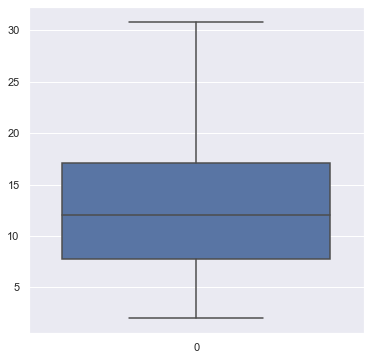

In [152]:
sns.boxplot(data=data2.lstat)

<AxesSubplot:>

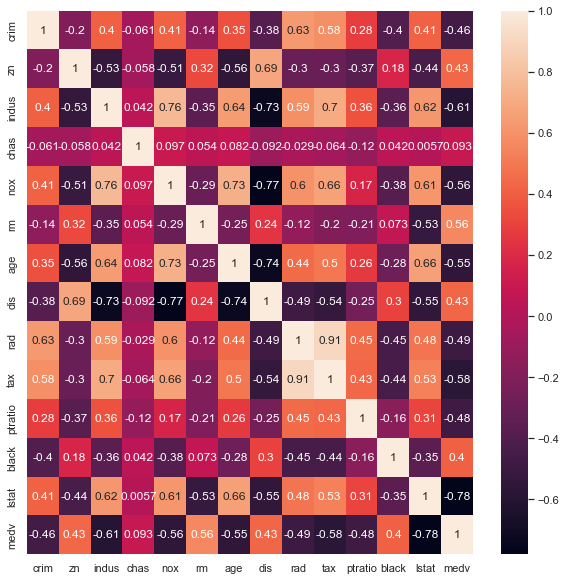

In [154]:
# Correlation matrix

plt.subplots(figsize=(10,10))
sns.heatmap(data2.corr(),annot=True)

In [155]:
# X - independent features
# y - dependent features

X=data2.drop(['black','ptratio','dis','chas','zn','crim','medv'],axis=1).values
y=data2['medv'].values

In [157]:
y=y.reshape(-1,1)

In [158]:
# data transformation

obj=StandardScaler()
X1=obj.fit_transform(X)
y1=obj.fit_transform(y)

In [159]:
#Splitting the data into X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.3,random_state=2)
print('X_train:',np.shape(X_train))
print('X_test:',np.shape(X_test))
print('y_train:',np.shape(y_train))
print('y_test:',np.shape(y_test))

X_train: (321, 7)
X_test: (138, 7)
y_train: (321, 1)
y_test: (138, 1)


In [160]:
#Model fitting and predication

lr=LinearRegression()
model=lr.fit(X_train,y_train)
model=lr.fit(X_train,y_train)
y_pred

array([[-0.36757044],
       [-0.05294242],
       [-0.77113838],
       [-0.80312456],
       [-0.26902269],
       [ 0.92977651],
       [ 0.91329678],
       [ 0.34116957],
       [-0.95761391],
       [ 0.58779344],
       [-0.92288071],
       [-0.65156156],
       [-0.84524759],
       [-0.6550362 ],
       [ 1.28687612],
       [-1.67279549],
       [ 0.53235125],
       [-0.44250872],
       [-0.03386233],
       [ 0.66421316],
       [-2.03927364],
       [ 0.14671139],
       [ 0.36671381],
       [-2.44761994],
       [ 0.0432724 ],
       [-0.29765867],
       [-0.23197282],
       [ 0.83619032],
       [ 1.04391679],
       [ 1.04625376],
       [ 1.02385563],
       [ 0.89464786],
       [-0.29030183],
       [ 0.92773403],
       [-0.49561374],
       [ 0.80428918],
       [ 1.12583253],
       [ 0.02706071],
       [-0.04567782],
       [ 0.92203266],
       [ 0.18067025],
       [-1.74163399],
       [ 0.34198961],
       [-0.81531901],
       [ 1.37165557],
       [-1

In [161]:
X_test

array([[-0.18620033, -0.06911226, -0.84672307, -0.10847874, -0.40209532,
         0.13315184,  0.10328472],
       [-0.20243346, -0.09471077, -0.89371446,  0.33787581, -0.63222219,
        -0.63275153, -0.22465096],
       [ 1.00767259,  1.57772525,  0.25576719,  1.00562222,  1.66904652,
         1.53331895,  0.75293929],
       [-0.46216354, -0.14590779, -1.1377082 ,  1.06632644, -0.63222219,
        -0.61480067,  1.25494509],
       [-0.79863206, -1.05892134, -1.0961389 ,  0.29502577, -0.28703188,
        -0.47717741, -0.0692312 ],
       [-1.33284961, -1.32343928,  1.21366855, -0.74408763, -0.51715875,
        -0.30963604, -1.06858022],
       [-0.79863206, -1.05892134,  0.5196419 , -1.97245535, -0.28703188,
        -0.47717741, -1.09500158],
       [-1.12624614, -1.39170197, -0.58465571, -1.75463433, -0.97741249,
        -0.56693171, -0.5743454 ],
       [ 1.22608197,  2.69552688, -0.125586  ,  1.13417233, -0.51715875,
        -0.04037314,  2.30869102],
       [-1.12624614, -1.3917

In [163]:
# Testing model

result=model.predict([[-0.18620033, -0.06911226, -0.84672307, -0.10847874, -0.40209532,
         0.13315184,  0.10328472]])
result

array([[-0.36757044]])

In [164]:
# Accuracy score

model.score(X_test,y_test)

0.639991813546829

In [165]:
#Coefficient values ,value of m ,y=mx+c

model.coef_

array([[-0.05645307,  0.08467312,  0.31569806, -0.11489519,  0.01381754,
        -0.33105926, -0.40135485]])

In [166]:
# Intercept of values,value of c ,y=mx+c
model.intercept_

array([-0.02629398])

In [168]:
#R2 Score

r2=r2_score(y_test,y_pred)
r2

0.639991813546829

In [169]:
# Adjusted R score

adj_r2=1-((1-r2)*(len(data.columns)-1)/(len(data.columns)-len([X])-1))
adj_r2

0.609991131342398